<a href="https://colab.research.google.com/github/SundharessB/Computer-Vision/blob/main/Ideal_low_pass_and_Ideal_high_pass_filter_in_frequency_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
src = cv.imread('/content/pikachu.jpeg')

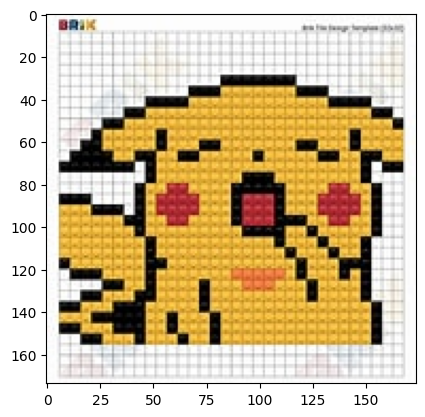

In [ ]:
img = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(img)


In [ ]:
tgray= cv.imread('/content/pikachu.jpeg',0)

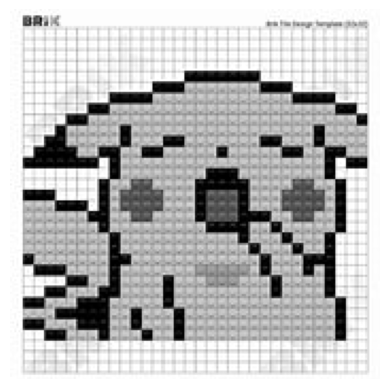

In [ ]:
plt.imshow(tgray, 'gray')
plt.axis('off')
plt.show()

Frequency Domain Transform:



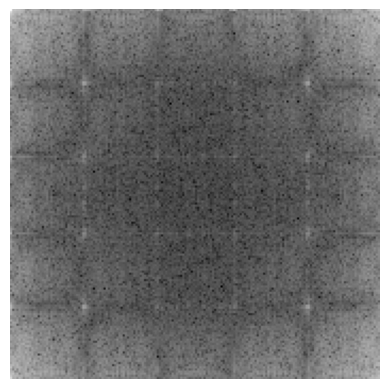

In [ ]:

G = np.fft.fft2(tgray)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

Frequency Domain Shift:



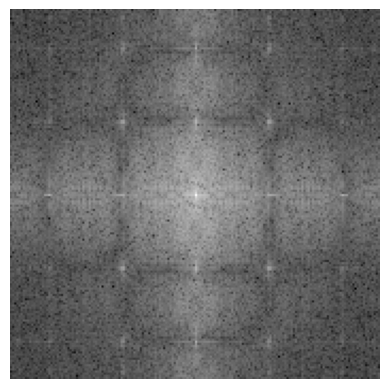

In [ ]:

Fshift = np.fft.fftshift(G)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')
plt.axis('off')
plt.show()

Low Pass Filter

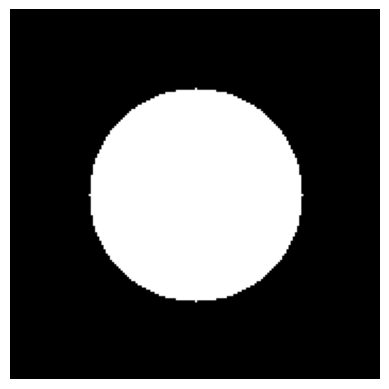

In [ ]:
M,N = tgray.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
plt.imshow(H,cmap='gray')
plt.axis('off')
plt.show()

removes high-frequency components from the image

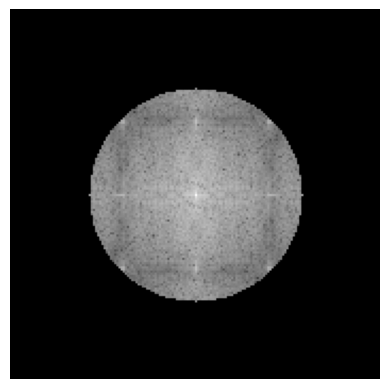

In [ ]:

Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

Inverse Frequency Shift:



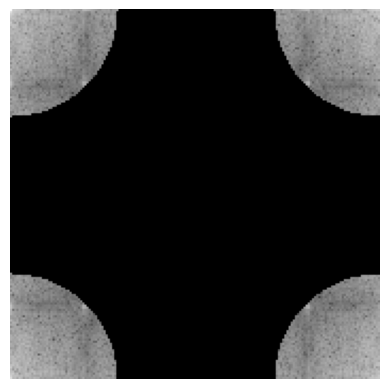

In [ ]:
Gi = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(Gi)),cmap='gray')
plt.axis('off')
plt.show()

Inverse Fourier Transform

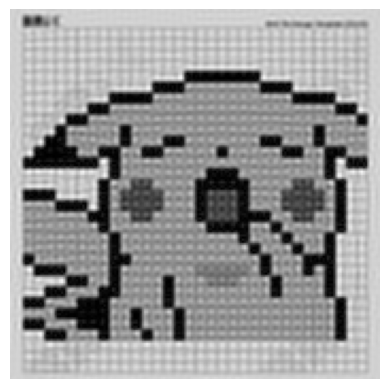

In [ ]:
g = np.abs(np.fft.ifft2(Gi))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

High Pass Filter

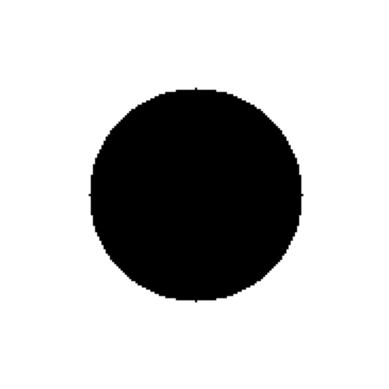

In [ ]:
H = 1 - H
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

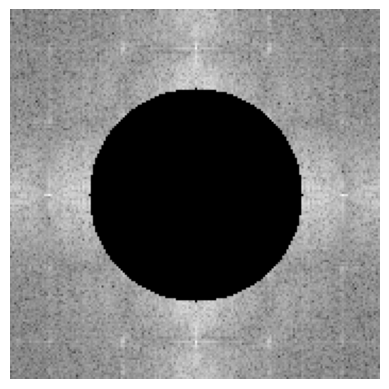

In [ ]:
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show()

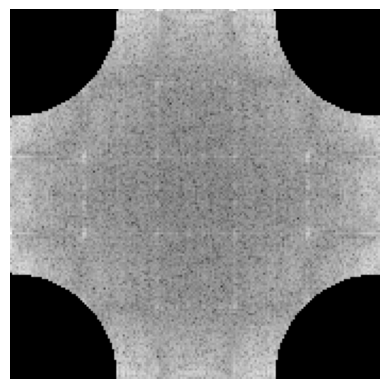

In [ ]:
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

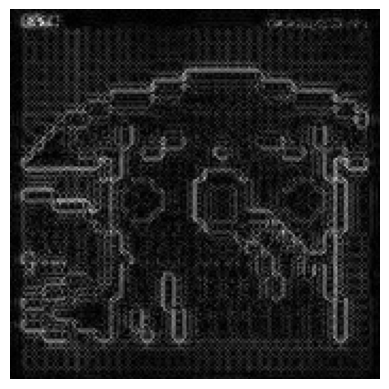

In [ ]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()